/Users/wongdowling/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


FWHM for Gaussian: 0.023548200450309493
FWHM for Lorentzian: 0.02
FWHM for Smeared Absolute Value's Second Derivative: [13195.32808987]


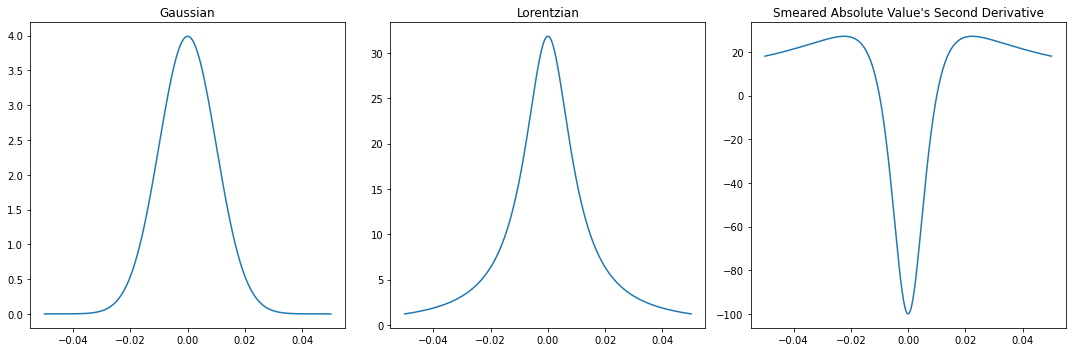

In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

epsilon = 1e-2  # you can make this smaller to approach 0

# Gaussian
def gaussian(x, epsilon):
    return (1/np.sqrt(2*np.pi*epsilon)) * np.exp(-x**2 / (2*epsilon**2))

# FWHM for Gaussian
fwhm_gaussian = 2 * np.sqrt(2 * np.log(2)) * epsilon

# Lorentzian
def lorentzian(x, epsilon):
    return epsilon / (np.pi * (x**2 + epsilon**2))

# FWHM for Lorentzian
fwhm_lorentzian = 2 * epsilon

# Smeared Absolute Value
def smeared_abs_derivative2(x, epsilon):
    return (x**2 - epsilon**2) / (x**2 + epsilon**2)**(3/2)

# Finding FWHM for Smeared Absolute Value's second derivative:
def half_max(x, epsilon):
    return smeared_abs_derivative2(x, epsilon) - 0.5 * smeared_abs_derivative2(0, epsilon)

root1 = fsolve(half_max, -1, args=(epsilon))
root2 = fsolve(half_max, 1, args=(epsilon))
fwhm_smeared = root2 - root1

print(f"FWHM for Gaussian: {fwhm_gaussian}")
print(f"FWHM for Lorentzian: {fwhm_lorentzian}")
print(f"FWHM for Smeared Absolute Value's Second Derivative: {fwhm_smeared}")

# Plotting
x = np.linspace(-5*epsilon, 5*epsilon, 1000)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(x, gaussian(x, epsilon))
plt.title('Gaussian')

plt.subplot(1, 3, 2)
plt.plot(x, lorentzian(x, epsilon))
plt.title('Lorentzian')

plt.subplot(1, 3, 3)
plt.plot(x, smeared_abs_derivative2(x, epsilon))
plt.title("Smeared Absolute Value's Second Derivative")

plt.tight_layout()
plt.show()


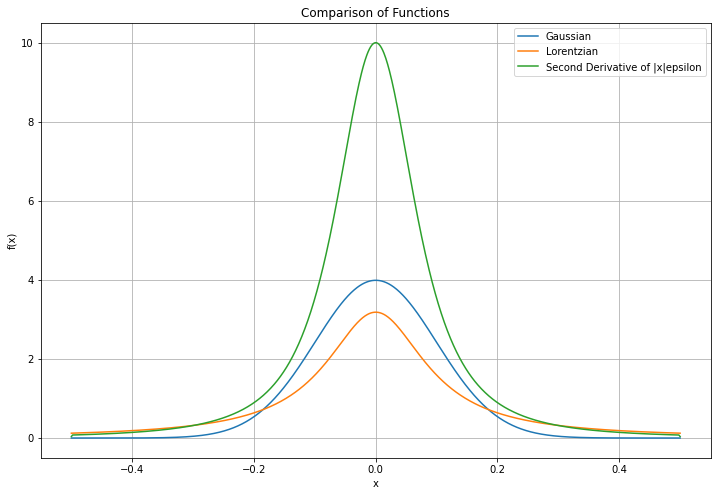

In [2]:
import numpy as np
import matplotlib.pyplot as plt

epsilon = 0.1  # Just an example value
x = np.linspace(-5*epsilon, 5*epsilon, 1000)

# Gaussian Peak
gaussian = (1/np.sqrt(2*np.pi*epsilon**2)) * np.exp(-x**2/(2*epsilon**2))

# Lorentzian Peak
lorentzian = (epsilon/np.pi) / (x**2 + epsilon**2)

# Second derivative of |x|epsilon
abs_value_function = np.sqrt(x**2 + epsilon**2)
second_derivative = np.gradient(np.gradient(abs_value_function, x), x)

# Plot
plt.figure(figsize=(12,8))
plt.plot(x, gaussian, label='Gaussian')
plt.plot(x, lorentzian, label='Lorentzian')
plt.plot(x, second_derivative, label="Second Derivative of |x|epsilon")
plt.legend()
plt.grid(True)
plt.title('Comparison of Functions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


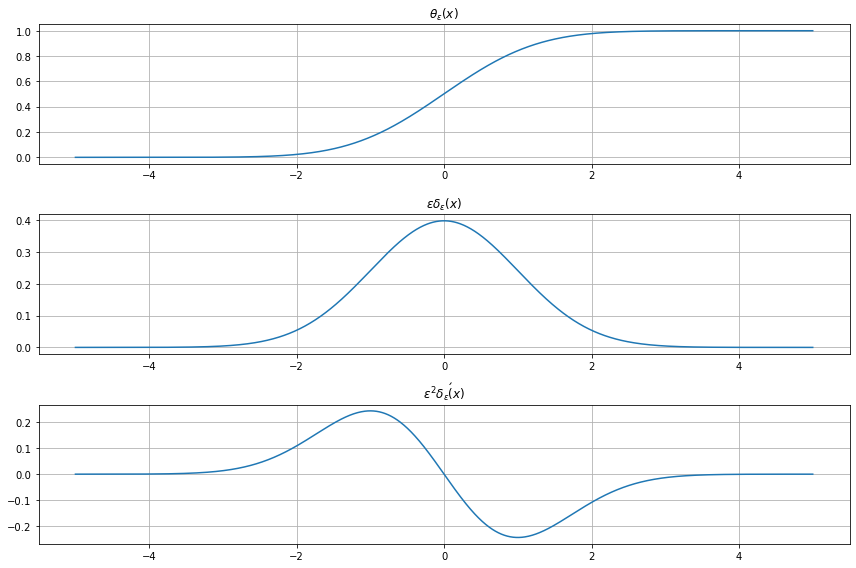

In [3]:
import numpy as np
import matplotlib.pyplot as plt

epsilon = 0.1  # example value
x = np.linspace(-5*epsilon, 5*epsilon, 1000)

# Gaussian Representation of Dirac delta
delta_epsilon = (1/np.sqrt(2*np.pi*epsilon**2)) * np.exp(-x**2/(2*epsilon**2))

# Functions
theta_epsilon = np.cumsum(delta_epsilon) * (x[1]-x[0])  # approximating the integral
epsilon_delta_epsilon = epsilon * delta_epsilon
epsilon2_delta_prime_epsilon = epsilon**2 * np.gradient(delta_epsilon, x)

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(x/epsilon, theta_epsilon)
plt.title(r'$\theta_\epsilon(x)$')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(x/epsilon, epsilon_delta_epsilon)
plt.title(r'$\epsilon \delta_\epsilon(x)$')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(x/epsilon, epsilon2_delta_prime_epsilon)
plt.title(r'$\epsilon^2 \delta_\epsilon\'(x)$')
plt.grid(True)

plt.tight_layout()
plt.show()


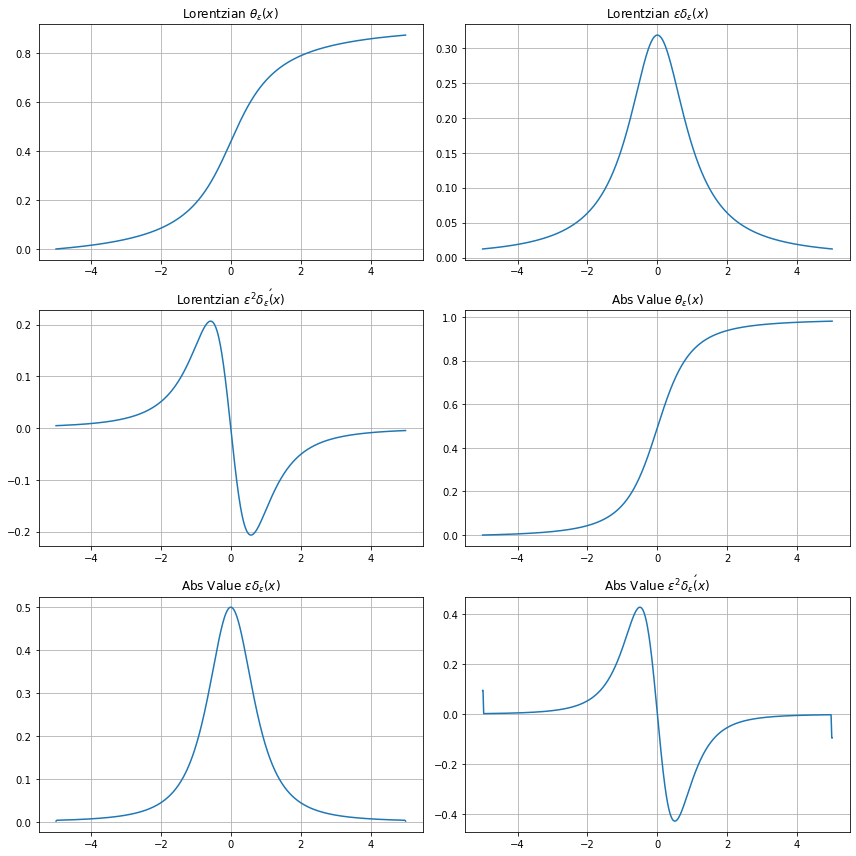

In [5]:
import numpy as np
import matplotlib.pyplot as plt

epsilon = 0.1  # example value
x = np.linspace(-5*epsilon, 5*epsilon, 1000)

# Lorentzian Peak
delta_epsilon_lorentzian = (epsilon/np.pi) / (x**2 + epsilon**2)
theta_epsilon_lorentzian = np.cumsum(delta_epsilon_lorentzian) * (x[1]-x[0])
epsilon_delta_epsilon_lorentzian = epsilon * delta_epsilon_lorentzian
epsilon2_delta_prime_epsilon_lorentzian = epsilon**2 * np.gradient(delta_epsilon_lorentzian, x)

# Second Derivative of 'Smeared' Absolute Value Function
abs_value_function = np.sqrt(x**2 + epsilon**2)
delta_epsilon_abs = np.gradient(np.gradient(0.5 * abs_value_function, x), x)
theta_epsilon_abs = np.cumsum(delta_epsilon_abs) * (x[1]-x[0])
epsilon_delta_epsilon_abs = epsilon * delta_epsilon_abs
epsilon2_delta_prime_epsilon_abs = epsilon**2 * np.gradient(delta_epsilon_abs, x)

# Plotting
plt.figure(figsize=(12, 12))

# Lorentzian
plt.subplot(3, 2, 1)
plt.plot(x/epsilon, theta_epsilon_lorentzian)
plt.title(r'Lorentzian $\theta_\epsilon(x)$')
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(x/epsilon, epsilon_delta_epsilon_lorentzian)
plt.title(r'Lorentzian $\epsilon \delta_\epsilon(x)$')
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(x/epsilon, epsilon2_delta_prime_epsilon_lorentzian)
plt.title(r'Lorentzian $\epsilon^2 \delta_\epsilon\'(x)$')
plt.grid(True)

# 'Smeared' Absolute Value Function
plt.subplot(3, 2, 4)
plt.plot(x/epsilon, theta_epsilon_abs)
plt.title(r'Abs Value $\theta_\epsilon(x)$')
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(x/epsilon, epsilon_delta_epsilon_abs)
plt.title(r'Abs Value $\epsilon \delta_\epsilon(x)$')
plt.grid(True)

plt.subplot(3, 2, 6)
plt.plot(x/epsilon, epsilon2_delta_prime_epsilon_abs)
plt.title(r'Abs Value $\epsilon^2 \delta_\epsilon\'(x)$')
plt.grid(True)

plt.tight_layout()
plt.show()


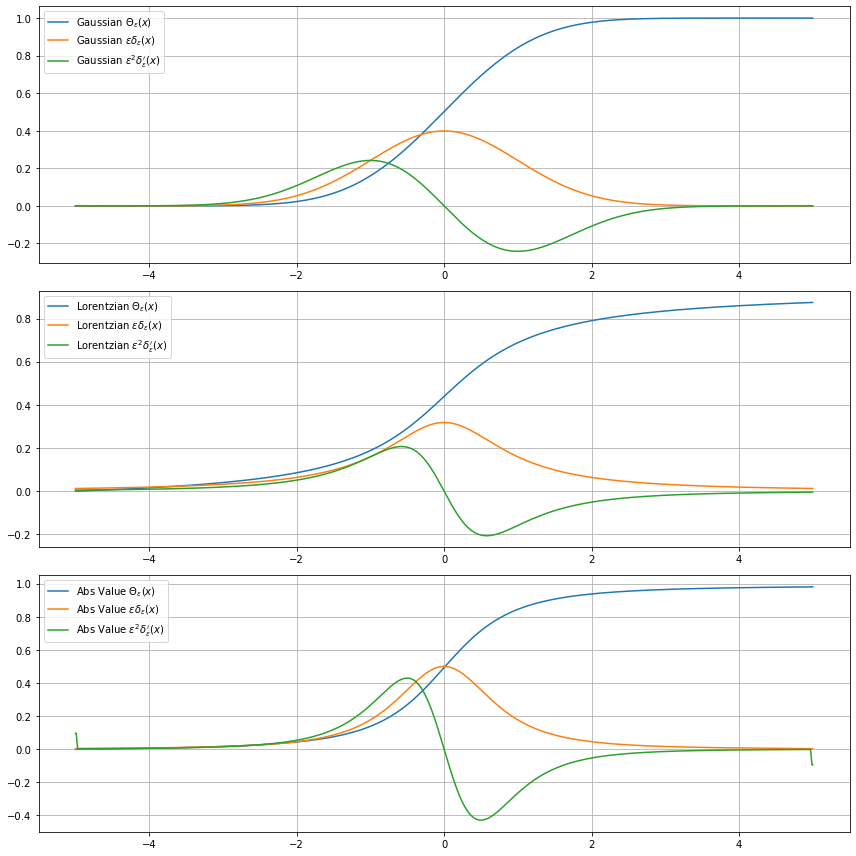

In [10]:
import numpy as np
import matplotlib.pyplot as plt

epsilon = 0.1  # example value
x = np.linspace(-5*epsilon, 5*epsilon, 1000)

# Gaussian Representation of Dirac delta
delta_epsilon = (1/np.sqrt(2*np.pi*epsilon**2)) * np.exp(-x**2/(2*epsilon**2))
theta_epsilon_gaussian = np.cumsum(delta_epsilon) * (x[1]-x[0])
epsilon_delta_epsilon_gaussian = epsilon * delta_epsilon
epsilon2_delta_prime_epsilon_gaussian = epsilon**2 * np.gradient(delta_epsilon, x)

# Lorentzian Peak
delta_epsilon_lorentzian = (epsilon/np.pi) / (x**2 + epsilon**2)
theta_epsilon_lorentzian = np.cumsum(delta_epsilon_lorentzian) * (x[1]-x[0])
epsilon_delta_epsilon_lorentzian = epsilon * delta_epsilon_lorentzian
epsilon2_delta_prime_epsilon_lorentzian = epsilon**2 * np.gradient(delta_epsilon_lorentzian, x)

# Second Derivative of 'Smeared' Absolute Value Function
abs_value_function = np.sqrt(x**2 + epsilon**2)
delta_epsilon_abs = np.gradient(np.gradient(0.5 * abs_value_function, x), x)
theta_epsilon_abs = np.cumsum(delta_epsilon_abs) * (x[1]-x[0])
epsilon_delta_epsilon_abs = epsilon * delta_epsilon_abs
epsilon2_delta_prime_epsilon_abs = epsilon**2 * np.gradient(delta_epsilon_abs, x)

# Plotting
plt.figure(figsize=(12, 12))

# Gaussian
plt.subplot(3, 1, 1)
plt.plot(x/epsilon, theta_epsilon_gaussian, label='Gaussian $ \Theta_\epsilon(x)$')
plt.plot(x/epsilon, epsilon_delta_epsilon_gaussian, label='Gaussian $\epsilon \delta_\epsilon(x)$')
plt.plot(x/epsilon, epsilon2_delta_prime_epsilon_gaussian, label='Gaussian $\epsilon^2 \delta_\epsilon\'(x)$')
plt.legend()
plt.grid(True)

# Lorentzian
plt.subplot(3, 1, 2)
plt.plot(x/epsilon, theta_epsilon_lorentzian, label='Lorentzian $ \Theta_\epsilon(x)$')
plt.plot(x/epsilon, epsilon_delta_epsilon_lorentzian, label='Lorentzian $\epsilon \delta_\epsilon(x)$')
plt.plot(x/epsilon, epsilon2_delta_prime_epsilon_lorentzian, label='Lorentzian $\epsilon^2 \delta_\epsilon\'(x)$')
plt.legend()
plt.grid(True)

# 'Smeared' Absolute Value Function
plt.subplot(3, 1, 3)
plt.plot(x/epsilon, theta_epsilon_abs, label='Abs Value $ \Theta_\epsilon(x)$')
plt.plot(x/epsilon, epsilon_delta_epsilon_abs, label='Abs Value $\epsilon \delta_\epsilon(x)$')
plt.plot(x/epsilon, epsilon2_delta_prime_epsilon_abs, label='Abs Value $\epsilon^2 \delta_\epsilon\'(x)$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
